<a href="https://colab.research.google.com/github/saichandboyapati/vrsec-pytorch/blob/main/VRSEC_Pytorch_ModelEvaluation_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries and Generate Non-Linear Data

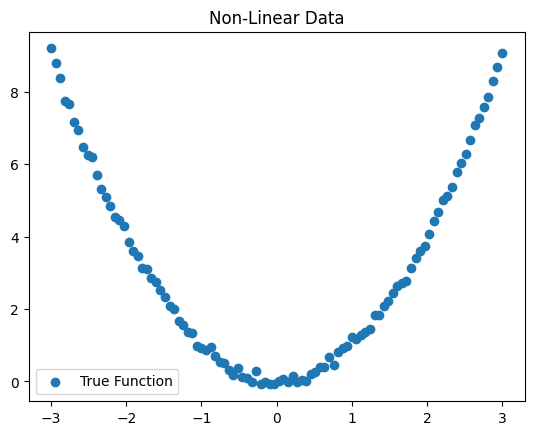

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Generate non-linear data (parabolic function)
torch.manual_seed(42)
X = torch.linspace(-3, 3, 100).reshape(-1, 1)
y = X**2 + 0.1 * torch.randn(X.shape)  # Quadratic function with noise

plt.scatter(X.numpy(), y.numpy(), label="True Function")
plt.legend()
plt.title("Non-Linear Data")
plt.show()

# 2.Define a Simple Linear Model (Underfitting)

In [2]:
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Single-layer (too simple for non-linear data)

    def forward(self, x):
        return self.linear(x)

# Initialize model, loss function, and optimizer
model = SimpleLinearModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


3.Train the Model

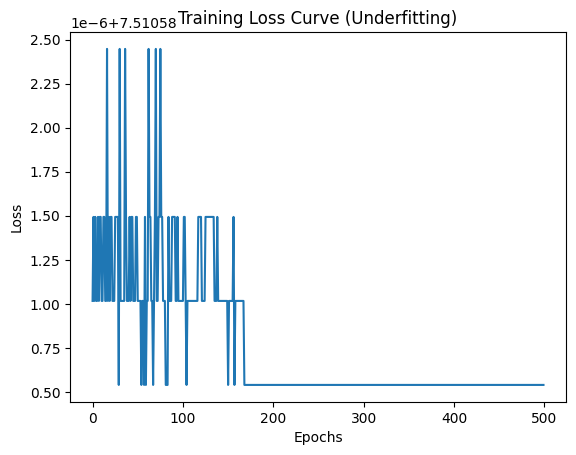

In [5]:
epochs = 500
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot loss
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve (Underfitting)")
plt.show()

4.Visualizing the Model’s Predictions

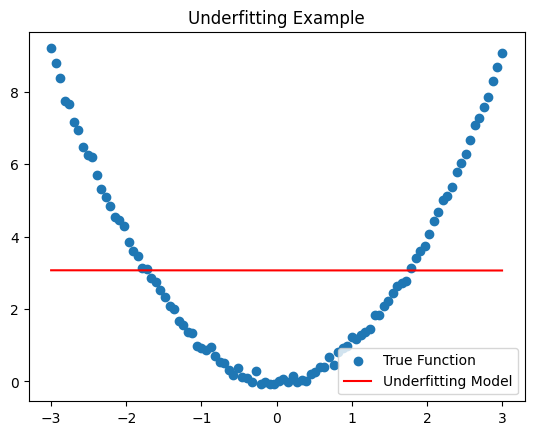

In [4]:
with torch.no_grad():
    y_pred = model(X)

plt.scatter(X.numpy(), y.numpy(), label="True Function")
plt.plot(X.numpy(), y_pred.numpy(), color='red', label="Underfitting Model")
plt.legend()
plt.title("Underfitting Example")
plt.show()